# Módulo 4 - Projeto 1: *support vector machines*

Professora: Esther Colombini -- esther@ic.unicamp.br

Monitores: Alana Santana -- alana.correia@ic.unicamp.br

Este *notebook* faz parte da disciplina INF-0616 no curso de extensão MDC.  
Demais artefatos podem ser encontrados no moodle da disciplina: 
[moodle.lab.ic.unicamp.br/469](https://moodle.lab.ic.unicamp.br/moodle/course/view.php?id=469)

Instituto de Computação - Unicamp 2022

In [1]:
from __future__ import print_function

from math import ceil

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split

import seaborn as sns

from IPython.display import display

In [2]:
np.random.seed(1082141)
sns.set()

## Classificando imagens de dígitos
### Lendo o conjunto de dados

**Pen-Based Recognition of Handwritten Digits Data Set**
é um banco de imagens simples e bem conhecido em reconhecimento de imagens.  
Ele é composto por imagens em escala cinza de 8 por 8 pixels divididas em 10 classes de dígitos.

Uma descrição completa pode ser encontrada no seguinte link: [archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits](http://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits)

In [3]:
x, y = datasets.load_digits(return_X_y=True)

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=.5,
                                                    random_state=183212)
print('amostras em treino: %i' % x_train.shape[0],
      'amostras em teste: %i' % x_test.shape[0],
      'número de características: %i' % x_train.shape[1],
      'número de classes: %i' % (np.max(y_train) + 1),
      sep='\n', end='\n\n')

amostras em treino: 898
amostras em teste: 899
número de características: 64
número de classes: 10



### 64 primeiras amostras no conjunto de treinamento

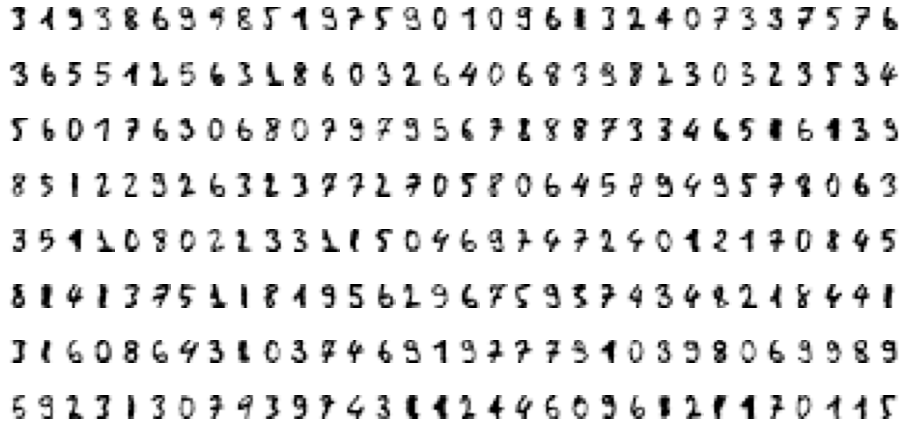

In [4]:
plt.figure(figsize=(16, 8))

for ix in range(8  * 32):
    plt.subplot(8, 32, ix + 1)
    plt.imshow(x_train[ix].reshape(8, 8), cmap='Greys')
    plt.axis('off')

### Visualizando o conjunto e frequências das classes

/home/nelson/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/nelson/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/nelson/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/nelson/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/nelson/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments w

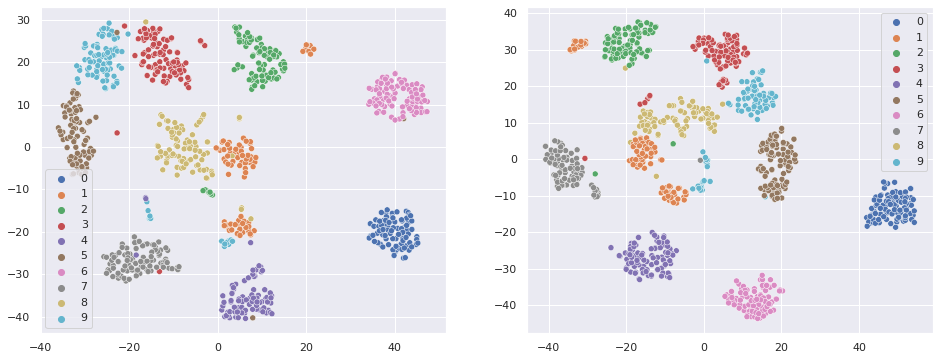

In [5]:
from sklearn.manifold import TSNE

encoder2D = TSNE()
w_train = encoder2D.fit_transform(x_train)
w_test = encoder2D.fit_transform(x_test)

plt.figure(figsize=(16, 6))
categorical_colors = sns.color_palette()

for ix, (x, y) in enumerate(((w_train, y_train), (w_test, y_test))):
    plt.subplot(1, 2, ix + 1)
    sns.scatterplot(*x.T, hue=y, palette=categorical_colors)

/home/nelson/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/nelson/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Frequencia das classes no conjunto de teste (899 amostras)'}>

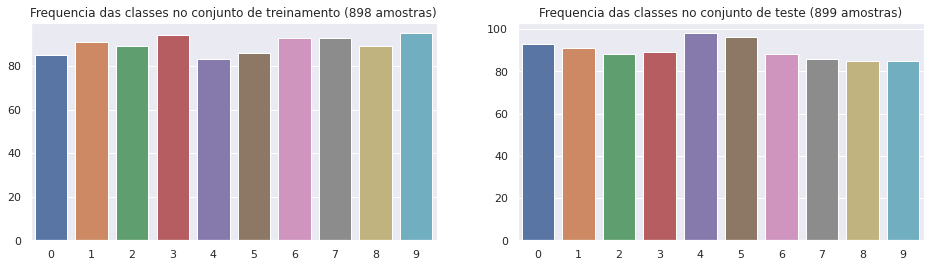

In [6]:
plt.figure(figsize=(16, 4))

plt.subplot(121)
plt.title('Frequencia das classes no conjunto de treinamento (%i amostras)' % len(x_train))
labels, counts = np.unique(y_train, return_counts=True)
sns.barplot(labels, counts)

plt.subplot(122)
plt.title('Frequencia das classes no conjunto de teste (%i amostras)' % len(x_test))
labels, counts = np.unique(y_test, return_counts=True)
sns.barplot(labels, counts)

### Modelando um classificador de digitos

**Atividade (3 pts):** defina e treine uma máquina de vetor de suporte com diferentes tipos de kernel, utilizando o scikit-learn. Avalie os diversos tipos de kernel e seus respectivos parâmetros com relação a qualidade da solução. Você deve separar uma parte do conjunto de treino para fazer a validação cruzada. Não utilize o conjunto de teste ainda.

In [7]:
# Dependencies
from typing import List
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn import neural_network
from sklearn import metrics
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from itertools import product
import matplotlib.pyplot as plt

# Standard scaler
scaler = StandardScaler()

# Fixing the seed
rs = 1082141

In [8]:
# Scaling the training data
x_train = scaler.fit_transform(x_train)

# Visualizing our dataset shape
x_train.shape
y_train.shape
metrics.SCORERS.keys()

# Function to apply SVM with Linear Kernel
def train_cv_linear_svm(x_train, y_train, penalty_array, cv=10) -> List:
    mean_scores = []
    for penalty in penalty_array:
        print(f"Training SVM with linear Kernel for penalty = {penalty}")
        # Training the SVM with CV-folds
        clf = svm.SVC(kernel='linear', C=penalty, random_state=rs)
        scores = cross_val_score(clf, x_train, y_train, cv=cv, scoring='accuracy')
        mean_scores.append(scores.mean())
    
    return mean_scores

# Function to apply SVM with RBF Kernel
def train_cv_rbf_svm(x_train, y_train, penalty_array, gamma_array, cv=10) -> List:
    mean_scores = []
    for (k, (penalty, gamma)) in enumerate(product(penalty_array, gamma_array)):
        print(f"Training SVM with RBF Kernel for penalty = {penalty} and gamma = {gamma}")
        clf = svm.SVC(kernel='rbf', C=penalty, gamma=gamma, random_state=rs)
        scores = cross_val_score(clf, x_train, y_train, cv=cv, scoring='accuracy')
        # Appending the respectives penalty and gamma as we are in three dimensions write now
        mean_scores.append([penalty, gamma, scores.mean()])
    
    return mean_scores


# Applying linear and RBF kernel's SVM (THIS MAY TAKE A WHILE FOR RBF, WE'RE TRYING ALL THE COMBINATIONS)
c_range = [1e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 5e-1, 1e0, 5e0, 1e1, 5e1, 1e2, 500, 1e3]
gamma_range = [1e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 5e-1, 1e0, 5e0, 1e1, 5e1, 1e2, 500, 1e3]

c_scores_linear = train_cv_linear_svm(x_train=x_train, y_train=y_train, penalty_array=c_range)
c_scores_rbf = train_cv_rbf_svm(x_train=x_train, y_train=y_train, penalty_array=c_range, gamma_array=gamma_range)

Training SVM with linear Kernel for penalty = 0.0001
Training SVM with linear Kernel for penalty = 0.001
Training SVM with linear Kernel for penalty = 0.005
Training SVM with linear Kernel for penalty = 0.01
Training SVM with linear Kernel for penalty = 0.05
Training SVM with linear Kernel for penalty = 0.1
Training SVM with linear Kernel for penalty = 0.5
Training SVM with linear Kernel for penalty = 1.0
Training SVM with linear Kernel for penalty = 5.0
Training SVM with linear Kernel for penalty = 10.0
Training SVM with linear Kernel for penalty = 50.0
Training SVM with linear Kernel for penalty = 100.0
Training SVM with linear Kernel for penalty = 500
Training SVM with linear Kernel for penalty = 1000.0
Training SVM with RBF Kernel for penalty = 0.0001 and gamma = 0.0001
Training SVM with RBF Kernel for penalty = 0.0001 and gamma = 0.001
Training SVM with RBF Kernel for penalty = 0.0001 and gamma = 0.005
Training SVM with RBF Kernel for penalty = 0.0001 and gamma = 0.01
Training SVM

Training SVM with RBF Kernel for penalty = 5.0 and gamma = 0.01
Training SVM with RBF Kernel for penalty = 5.0 and gamma = 0.05
Training SVM with RBF Kernel for penalty = 5.0 and gamma = 0.1
Training SVM with RBF Kernel for penalty = 5.0 and gamma = 0.5
Training SVM with RBF Kernel for penalty = 5.0 and gamma = 1.0
Training SVM with RBF Kernel for penalty = 5.0 and gamma = 5.0
Training SVM with RBF Kernel for penalty = 5.0 and gamma = 10.0
Training SVM with RBF Kernel for penalty = 5.0 and gamma = 50.0
Training SVM with RBF Kernel for penalty = 5.0 and gamma = 100.0
Training SVM with RBF Kernel for penalty = 5.0 and gamma = 500
Training SVM with RBF Kernel for penalty = 5.0 and gamma = 1000.0
Training SVM with RBF Kernel for penalty = 10.0 and gamma = 0.0001
Training SVM with RBF Kernel for penalty = 10.0 and gamma = 0.001
Training SVM with RBF Kernel for penalty = 10.0 and gamma = 0.005
Training SVM with RBF Kernel for penalty = 10.0 and gamma = 0.01
Training SVM with RBF Kernel for p

Best accuracy of 0.9788639200998753 for Penalty of 0.05


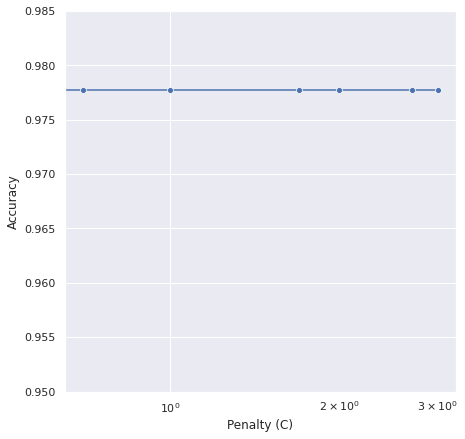

In [9]:
# Plotting accuracy for linear kernel and getting the best accuracy and the respective C parameter
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", xlabel="Penalty (C)", ylabel="Accuracy")
sns.lineplot(x=c_range, y=c_scores_linear, marker="o", ax=ax)
plt.ylim(0.95, 0.985)
max_score_linear = max(c_scores_linear)
penalty_max_score_linear = c_range[np.argmax(c_scores_linear)]
print(f"Best accuracy of {max_score_linear} for Penalty of {penalty_max_score_linear}")

In [10]:
# Getting the best score
c_scores_rbf = np.array(c_scores_rbf)
print(c_scores_rbf.shape)
penalty_gamma_max_score_rbf_index = np.argmax(c_scores_rbf, axis=0)[2]
penalty_max_score_rbf, gamma_max_score_rbf, max_score_rbf = c_scores_rbf[penalty_gamma_max_score_rbf_index]
print(f"Best accuracy of {max_score_rbf} for Penalty of {penalty_max_score_rbf} and gamma of {gamma_max_score_rbf}")

(196, 3)
Best accuracy of 0.9810986267166044 for Penalty of 5.0 and gamma of 0.01


SVM se mostra como uma técnica de classificação relativamente eficiente quando temos um número razoável de features. No trabalho vigente, experimentamos realizar o treinamento de modelos com Kernel **Linear** e **RBF**.
- Linear: $\langle x, x'\rangle$ 
    - Para tal Kernel, selecionamos um range do parâmetro `C`, o qual representa um ratio entre a classificação do treinamento e a maximização da margem de separação. Se usamos valores muito reduzidos de tal parâmetro, maximizamos a margem, o que pode acabar gerando o fenômeno de *underfitting*, dado que o modelo acaba sendo muito generalista, não se adequando idealmente ao conjunto de dados selecionado, penalizando **pouco** o modelo no treino. No caso de valores muito altos, criamos hiperplanos de separação mais complicados, o que pode gerar o fenômeno de *overfitting*. No modelo vigente, conseguimos ver que, para `C = 0.05` encontramos a melhor `accuracy` no treinamento
- RBF: $\exp(-\gamma \|x-x'\|^2)$
    - Para tal Kernel, selecionamos um range do parâmetro `C` e do parâmetro `gamma`, e testamos múltiplas combinações entre esses parâmetros no treinamento. O parâmetro gamma define quanto de influência uma simples amostra de treinamento possue no modelo. Quanto maior o gamma, dada a exponencial negativa, menor o raio de influência dos vetores suporte (inclui apenas o próprio vetor), ocasionando em *overfitting*.
 

### Avaliando o modelo treinado

**Atividade (2 pts):** avalie o seu melhor modelo treinado no item anterior sobre o conjunto de teste previamente separado. Reporte a acurácia média, a matriz de confusão e outras métricas que achar válido.

Observando-se dos resultados anteriores, obtivemos o melhor modelo treinado como sendo o modelo RBF com acurácia de ~0.981 cujos valores de `C` e `gamma` foram respectivamente de 5.0 e 0.01. Vamos retreinar tal modelo e experimentar no conjunto de testes

The accuracy of the best SVM model for the test set is 0.9766407119021134 and the precision for the digits from 0 to 9 is 0.9766407119021134


Text(0.5, 1.0, 'Confusion Matrix')

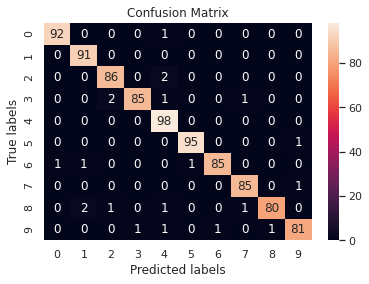

In [11]:
# Scaling the test data
x_test = scaler.fit_transform(x_test)

# Best model trained previously being retrained
clf = svm.SVC(kernel='rbf', C=penalty_max_score_rbf, gamma=gamma_max_score_rbf, random_state=rs)
clf.fit(X=x_train, y=y_train)

# Applying prediction to test set
y_pred_test = clf.predict(x_test)

# Applying accuracy and precision
acc_best_svm_test = metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test)
prec_best_svm_test = metrics.precision_score(y_true=y_test, y_pred=y_pred_test, average='micro')
print(f"The accuracy of the best SVM model for the test set is {acc_best_svm_test} and the precision for the digits from 0 to 9 is {prec_best_svm_test}")

# Confusion matrix
cm_best_svm_test = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_test)
ax= plt.subplot()
sns.heatmap(cm_best_svm_test, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix')


**Atividade (4 pts):** treine dois ou mais classificadores (Random forest, logistic regression, etc.) e reporte o suas respectivas métricas sobre as porções de validação separadas (acurácia, acurácia balanceada, precision, etc). Compare seus melhores classificadores com os resultados da SVM no conjunto de teste. 



Vamos começar aplicando um modelo de *logistic regression* com *K-fold Cross Validation* a seguir:

In [12]:
# Function to appply Logistic regression
def train_cv_logistic_regression(x_train, y_train, penalty_array, cv=10) -> List:
    mean_scores = []
    for penalty in penalty_array:
        print(f"Training Logistic Regression for penalty = {penalty}")
        # Training the logistic regression with CV-folds
        lr = linear_model.LogisticRegression(C=penalty, multi_class='multinomial', random_state=rs, max_iter=1000)
        scores = cross_val_score(lr, x_train, y_train, cv=cv, scoring='accuracy')
        mean_scores.append(scores.mean())
    
    return mean_scores

# Getting logistic regression best accuracies to choose best C
c_scores_lr = train_cv_logistic_regression(x_train=x_train, y_train=y_train, penalty_array=c_range)

# Choosing best parameters for logistic regression
cv = 10
max_score_lr = max(c_scores_lr)
penalty_max_score_lr = c_range[np.argmax(c_scores_lr)]
print(f"Best accuracy of {max_score_lr} for Penalty of {penalty_max_score_lr}")

# Using best C to retrain the model and calculate its metrics with the training set
best_lr = linear_model.LogisticRegression(C=penalty_max_score_lr, multi_class='multinomial', random_state=rs, max_iter=1000)
accuracies_best_lr = cross_val_score(best_lr, x_train, y_train, cv=10, scoring='accuracy')
bal_accuracies_best_lr = cross_val_score(best_lr, x_train, y_train, cv=10, scoring='balanced_accuracy')

scoring = metrics.make_scorer(metrics.precision_score, average='micro')
precisions_best_lr = cross_val_score(best_lr, x_train, y_train, cv=cv, scoring=scoring)

print(f"For the best model, the accuracies for {cv}-fold CV are {accuracies_best_lr}")
print(f"For the best model, the balanced accuracies for {cv}-fold CV are {bal_accuracies_best_lr}")
print(f"For the best model, the precisions for {cv}-fold CV are {precisions_best_lr}")


Training Logistic Regression for penalty = 0.0001
Training Logistic Regression for penalty = 0.001
Training Logistic Regression for penalty = 0.005
Training Logistic Regression for penalty = 0.01
Training Logistic Regression for penalty = 0.05
Training Logistic Regression for penalty = 0.1
Training Logistic Regression for penalty = 0.5
Training Logistic Regression for penalty = 1.0
Training Logistic Regression for penalty = 5.0
Training Logistic Regression for penalty = 10.0
Training Logistic Regression for penalty = 50.0
Training Logistic Regression for penalty = 100.0
Training Logistic Regression for penalty = 500
Training Logistic Regression for penalty = 1000.0
Best accuracy of 0.9588139825218477 for Penalty of 0.5
For the best model, the accuracies for 10-fold CV are [0.98888889 0.96666667 0.97777778 0.94444444 0.97777778 0.93333333
 0.92222222 0.94444444 0.98876404 0.94382022]
For the best model, the balanced accuracies for 10-fold CV are [0.98888889 0.96527778 0.97777778 0.94305

The accuracy of the best LR model for the test set is 0.9621802002224694 and the precision for the digits from 0 to 9 is 0.9621802002224694


Text(0.5, 1.0, 'Confusion Matrix')

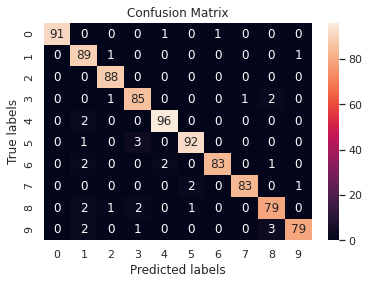

In [13]:
# Best model trained previously being retrained 
best_lr = linear_model.LogisticRegression(C=penalty_max_score_lr, multi_class='multinomial', random_state=rs, max_iter=1000)
best_lr.fit(X=x_train, y=y_train)

# Applying prediction to test set
y_pred_best_lr_test = best_lr.predict(x_test)

# Applying accuracy and precision to test set
acc_best_lr_test = metrics.accuracy_score(y_true=y_test, y_pred=y_pred_best_lr_test)
prec_best_lr_test = metrics.precision_score(y_true=y_test, y_pred=y_pred_best_lr_test, average='micro')
print(f"The accuracy of the best LR model for the test set is {acc_best_lr_test} and the precision for the digits from 0 to 9 is {prec_best_lr_test}")

# Confusion matrix
cm_best_lr_test = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_best_lr_test)
ax= plt.subplot()
sns.heatmap(cm_best_lr_test, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix')

Vamos aplicar uma *neural network* do tipo *Multi-layer Perceptron* simples com poucas *hidden layers*:

In [14]:
# Function to apply a simple neural net with ReLU as activation for fixed hidden-layers (Multi-layer Perceptron)
def train_cv_neural_net(x_train, y_train, alpha_array, cv=10) -> List:
    mean_scores = []
    for alpha in alpha_array:
        print(f"Training MLP for alpha = {alpha}")
        # Training the logistic regression with CV-folds
        mlp = neural_network.MLPClassifier(alpha=alpha, hidden_layer_sizes=(4,3), activation='relu', random_state=rs, max_iter=2000)
        scores = cross_val_score(mlp, x_train, y_train, cv=cv, scoring='accuracy')
        mean_scores.append(scores.mean())
    
    return mean_scores

alpha_range = [1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 5e-1]

# Getting neural network best accuracies to choose best alpha
alpha_scores_mlp = train_cv_neural_net(x_train=x_train, y_train=y_train, alpha_array=alpha_range)

# Choosing best parameters for mlp
cv = 10
max_score_mlp = max(alpha_scores_mlp)
alpha_max_score_mlp = alpha_range[np.argmax(alpha_scores_mlp)]
print(f"Best accuracy of {max_score_mlp} for Alpha of {alpha_max_score_mlp}")

Training MLP for alpha = 0.001
Training MLP for alpha = 0.005
Training MLP for alpha = 0.01
Training MLP for alpha = 0.05
Training MLP for alpha = 0.1
Training MLP for alpha = 0.5
Best accuracy of 0.8707865168539325 for Alpha of 0.5


In [15]:
# Using best alpha to retrain the model and calculate its metrics with the training set

print(f"Training model with Best accuracy of {max_score_mlp} for Alpha of {alpha_max_score_mlp}")
best_mlp = neural_network.MLPClassifier(alpha=alpha_max_score_mlp, hidden_layer_sizes=(4,3), activation='relu', random_state=rs, max_iter=2000)
accuracies_best_mlp = cross_val_score(best_mlp, x_train, y_train, cv=10, scoring='accuracy')
bal_accuracies_best_mlp = cross_val_score(best_mlp, x_train, y_train, cv=10, scoring='balanced_accuracy')

scoring = metrics.make_scorer(metrics.precision_score, average='micro')
precisions_best_mlp = cross_val_score(best_mlp, x_train, y_train, cv=cv, scoring=scoring)

print(f"For the best model, the accuracies for {cv}-fold CV are {accuracies_best_mlp}")
print(f"For the best model, the balanced accuracies for {cv}-fold CV are {bal_accuracies_best_mlp}")
print(f"For the best model, the precisions for {cv}-fold CV are {precisions_best_mlp}")


Training model with Best accuracy of 0.8707865168539325 for Alpha of 0.5
For the best model, the accuracies for 10-fold CV are [0.9        0.85555556 0.87777778 0.82222222 0.93333333 0.87777778
 0.85555556 0.87777778 0.82022472 0.88764045]
For the best model, the balanced accuracies for 10-fold CV are [0.89861111 0.85361111 0.87472222 0.81777778 0.93444444 0.87833333
 0.86111111 0.87888889 0.81916667 0.88916667]
For the best model, the precisions for 10-fold CV are [0.9        0.85555556 0.87777778 0.82222222 0.93333333 0.87777778
 0.85555556 0.87777778 0.82022472 0.88764045]


The accuracy of the best LR model for the test set is 0.8153503893214683 and the precision for the digits from 0 to 9 is 0.8153503893214683


Text(0.5, 1.0, 'Confusion Matrix')

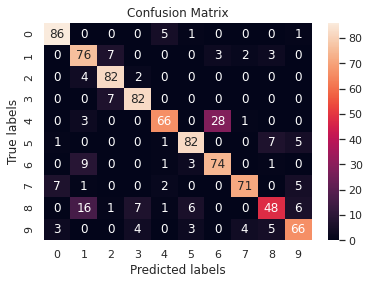

In [16]:
# Best model trained previously being retrained/fitted
best_mlp.fit(X=x_train, y=y_train)

# Applying prediction to test set
y_pred_best_mlp_test = best_mlp.predict(x_test)

# Applying accuracy and precision to test set
acc_best_mlp_test = metrics.accuracy_score(y_true=y_test, y_pred=y_pred_best_mlp_test)
prec_best_mlp_test = metrics.precision_score(y_true=y_test, y_pred=y_pred_best_mlp_test, average='micro')
print(f"The accuracy of the best MLP model for the test set is {acc_best_mlp_test} and the precision for the digits from 0 to 9 is {prec_best_mlp_test}")

# Confusion matrix
cm_best_mlp_test = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_best_mlp_test)
ax= plt.subplot()
sns.heatmap(cm_best_mlp_test, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix')

In [79]:
# Function to apply Random Forest Classifier
def train_cv_random_forest(x_train, y_train, n_estimators, max_depth, sample_split, sample_leaf, cv=10) -> List:
    mean_scores = []
    for (k, (est, dep, split, leaf)) in enumerate(product(n_estimators, max_depth, sample_split, sample_leaf)):
        print(f"Training RF n_estimators = {est}, max_depth = {dep}, min_sample_split {split}, and min_sample_leaf {leaf}")
        rfc = RandomForestClassifier(n_estimators=est, 
                                     max_depth=dep, 
                                     min_samples_split=split, 
                                     min_samples_leaf=leaf)
        scores = cross_val_score(rfc, x_train, y_train, cv=cv, scoring='accuracy')
        # Appending the respectives parameters we are using
        mean_scores.append([est, dep, split, leaf, scores.mean()])
    
    return mean_scores

n_estimators = [50, 100] # number of trees in the random forest
max_depth = [15, 20, 25] # maximum number of levels allowed in each decision tree
min_samples_leaf = [2, 4] # minimum sample number that can be stored in a leaf node

c_scores_rfc = train_cv_random_forest(x_train=x_train, y_train=y_train, 
                                      n_estimators=n_estimators,
                                      max_depth=max_depth,
                                      sample_split=min_samples_split,
                                      sample_leaf=min_samples_leaf)

Training RF n_estimators = 50, max_depth = 15, min_sample_split 2, and min_sample_leaf 2
Training RF n_estimators = 50, max_depth = 15, min_sample_split 2, and min_sample_leaf 4
Training RF n_estimators = 50, max_depth = 15, min_sample_split 3, and min_sample_leaf 2
Training RF n_estimators = 50, max_depth = 15, min_sample_split 3, and min_sample_leaf 4
Training RF n_estimators = 50, max_depth = 15, min_sample_split 4, and min_sample_leaf 2
Training RF n_estimators = 50, max_depth = 15, min_sample_split 4, and min_sample_leaf 4
Training RF n_estimators = 50, max_depth = 20, min_sample_split 2, and min_sample_leaf 2
Training RF n_estimators = 50, max_depth = 20, min_sample_split 2, and min_sample_leaf 4
Training RF n_estimators = 50, max_depth = 20, min_sample_split 3, and min_sample_leaf 2
Training RF n_estimators = 50, max_depth = 20, min_sample_split 3, and min_sample_leaf 4
Training RF n_estimators = 50, max_depth = 20, min_sample_split 4, and min_sample_leaf 2
Training RF n_estimat

In [80]:
max_score_rf = max([x[-1] for x in c_scores_rfc])

best_params_rf = c_scores_rfc[np.argmax([x[-1] for x in c_scores_rfc])]

print(f"Best accuracy of {max_score_rf} for {best_params_rf[0]} trees, \
max_depth = {best_params_rf[1]}, and sample_leaf= {best_params_rf[3]}")

Best accuracy of 0.9677153558052434 for 100 trees, max_depth = 15, and sample_leaf= 2


In [81]:
print(f"Training model with Best accuracy of {max_score_rf} for choosen parameters")
best_rfc = RandomForestClassifier(n_estimators=150, max_depth=15, min_samples_split=2, min_samples_leaf=2)

accuracies_best_rfc = cross_val_score(best_rfc, x_train, y_train, cv=10, scoring='accuracy')
bal_accuracies_best_rfc = cross_val_score(best_rfc, x_train, y_train, cv=10, scoring='balanced_accuracy')

scoring = metrics.make_scorer(metrics.precision_score, average='micro')
precisions_best_frc = cross_val_score(best_rfc, x_train, y_train, cv=cv, scoring=scoring)

print(f"For the best model, the accuracies for {cv}-fold CV are {accuracies_best_mlp}")
print(f"For the best model, the balanced accuracies for {cv}-fold CV are {bal_accuracies_best_mlp}")
print(f"For the best model, the precisions for {cv}-fold CV are {precisions_best_mlp}")





Training model with Best accuracy of 0.9677153558052434 for choosen parameters
For the best model, the accuracies for 10-fold CV are [0.9        0.85555556 0.87777778 0.82222222 0.93333333 0.87777778
 0.85555556 0.87777778 0.82022472 0.88764045]
For the best model, the balanced accuracies for 10-fold CV are [0.89861111 0.85361111 0.87472222 0.81777778 0.93555556 0.87833333
 0.89333333 0.86888889 0.81916667 0.88916667]
For the best model, the precisions for 10-fold CV are [0.9        0.85555556 0.87777778 0.82222222 0.93333333 0.87777778
 0.85555556 0.87777778 0.82022472 0.88764045]


The accuracy of the best RFC model for the test set is 0.967741935483871 and the precision for the digits from 0 to 9 is 0.967741935483871


Text(0.5, 1.0, 'Confusion Matrix')

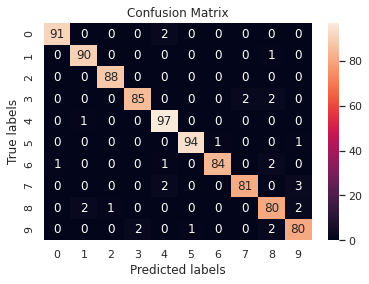

In [82]:
# Best model trained previously being retrained/fitted
best_rfc.fit(X=x_train, y=y_train)

# Applying prediction to test set
y_pred_best_rfc_test = best_rfc.predict(x_test)

# Applying accuracy and precision to test set
acc_best_rfc_test = metrics.accuracy_score(y_true=y_test, y_pred=y_pred_best_rfc_test)
prec_best_rfc_test = metrics.precision_score(y_true=y_test, y_pred=y_pred_best_rfc_test, average='micro')
print(f"The accuracy of the best RFC model for the test set is {acc_best_rfc_test} and \
the precision for the digits from 0 to 9 is {prec_best_rfc_test}")

# Confusion matrix
cm_best_rfc_test = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_best_rfc_test)
ax= plt.subplot()
sns.heatmap(cm_best_rfc_test, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix')

**Pergunta (1pt):** qual classificador apresentou os melhores resultados? Qual critério você utilizou para definir sua escolha? Discuta.

Dentre todos os modelos verificados, **SVM Linear**, **SVM RBF**, **Logistic Regression**, **MLP** e **Random Forest Classifier**, o modelo que apresentou melhor resultado foi a **SVM RBF**. Usamos como critério tanto uma análise da matriz de confusão como os resultados da acurácia e precisão. Notamos que para o *SVM RBF* obtivemos uma acurácia de $0.976$ no conjunto de teste. A acurácia para a *Logistic Regression* ficou em $0.962$, e para a *Random Forest* em $0.967$, valores que estão bem próximos do melhor método encontrado.

Note que fizemos a busca por hiperparâmetros (um *Grid Search* implementado manualmente) de maneira mais extensiva apenas para o SVM não-linear, e portanto poderíamos encontrar resultados melhores para os outros métodos se tivéssemos testado mais valores de hiperparâmetros e/ou variado os métodos de otimização. Em particular, para o *MLP*, testamos um modelo muito simples com pouca profundidade, ou seja, o modelo não foi capaz de extrair suficientemente as features das imagens.